In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import random as r

In [2]:
dataset =pd.read_csv("auto-mpg.csv")


In [3]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
target = dataset[['mpg']]


In [5]:
dataset.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [6]:
features=dataset[['displacement','weight','acceleration','cylinders','model year']]
weights0=np.random.rand(features.shape[1],1)
bias0=np.random.rand(1,1)

In [24]:
def line(m,x,c):
    return np.matmul(x,m) + c

def error(m,x,c,y):
    return np.array(np.mean((line(m,x,c)-y)**2))[0]

def derivative_wrt_weights(m,x,c,y):
    derivatives=2*np.mean(np.multiply(x,line(m,x,c)-y))
    derivatives= np.array(derivatives)
    derivatives=derivatives.reshape(features.shape[1],1)
    return derivatives
     

def derivative_wrt_bias(m,x,c,y):
    derivative=2*np.mean(line(m,x,c)-y)
    derivative= np.array(derivative)
    derivative=derivative.reshape(1,1)
    return derivative

def scalar(x):
    return (x-np.mean(x))/np.std(x)

def accuracy(m,x,c,y):
    currentError = error(m,features,c,target)
    maxError = np.mean(target**2)
    return (1-(currentError / maxError))[0]*100

In [27]:
error(weights,features,bias,target)

0.7338345575913704

0.9002946154912014


Text(0,0.5,'Error')

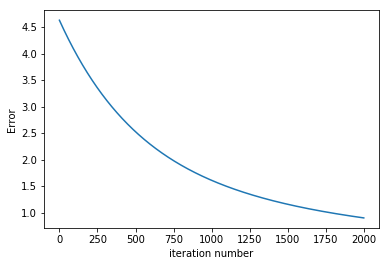

In [31]:
alpha=0.00015
weights=weights0
bias=bias0
features=scalar(features)
target=scalar(target)
cost=[]
for i in range(2000):
    weights=weights-alpha*derivative_wrt_weights(weights,features,bias,target)
    bias=bias-alpha*derivative_wrt_bias(weights,features,bias,target)
    cost.append(error(weights,features,bias,target))
    clear_output(True)
    print(cost[i])
    
plt.plot(cost)
plt.xlabel("iteration number")
plt.ylabel("Error")

In [32]:
prediction=line(weights,features,bias)


In [33]:
print("The error is : ",error(weights,features,bias,target))
print("The accuracy is : ",accuracy(weights,features,bias,target),'%')

The error is :  0.9002946154912014
The accuracy is :  9.970538450879907 %


# actual target values are in RED and predicted values are in BLUE

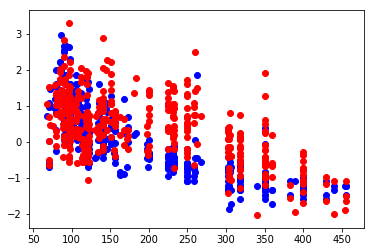

In [37]:
plt.scatter(dataset['displacement'],target,color='blue')
plt.scatter(dataset['displacement'],prediction,color='red')

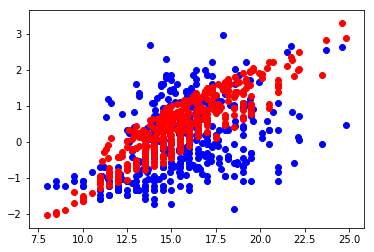

In [38]:
plt.scatter(dataset['acceleration'],target,color='blue')
plt.scatter(dataset['acceleration'],prediction,color='red')

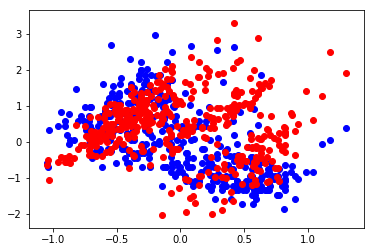

In [39]:
plt.scatter(np.mean(features,axis=1),target,color='blue')
plt.scatter(np.mean(features,axis=1),prediction,color='red')